### Name - Anirudh Tyagi
### School - School Of Computing and Data Science
### E-mail - anirudh.t-26@scds.saiuniversity.edu.in

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from numpy import load
X_train_std = load('/content/drive/MyDrive/DL PROJECT/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/DL PROJECT/X_test_std.npy')
y_train = load('/content/drive/MyDrive/DL PROJECT/y_train.npy')
y_test = load('/content/drive/MyDrive/DL PROJECT/y_test.npy')

In [4]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (719, 299, 299, 3)
X_test_std_shape: (240, 299, 299, 3)


In [5]:
model3_FT = keras.models.load_model("/content/drive/MyDrive/DL PROJECT/Model3_TL.keras")
model3_FT.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_prestem_no… │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stem        │ (None, None, None, 96) │          4,896 │ convnext_tiny_prestem… │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, None, None, 96) │          4,800 │ convnext_tiny_stem[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, None, None, 96) │            192 │ convnext_tiny_stage_0… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, None, None,     │         37,248 │ convnext_tiny_stage_0… │
│ (Dense)                   │ 384)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, None, None,     │              0 │ convnext_tiny_stage_0… │
│ (Activation)              │ 384)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, None, None, 96) │         36,960 │ convnext_tiny_stage_0… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, None, None, 96) │             96 │ convnext_tiny_stage_0… │
│ (LayerScale)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, None, None, 96) │              0 │ convnext_tiny_stage_0… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, None, None, 96) │              0 │ convnext_tiny_stem[0]… │
│                           │                        │                │ convnext_tiny_stage_0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, None, None, 96) │          4,800 │ add[0][0]              │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, None, None, 96) │            192 │ convnext_tiny_stage_0… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0

 Total params: 27,837,809 (106.19 MB)

 Trainable params: 5,381 (21.02 KB)

 Non-trainable params: 27,821,664 (106.13 MB)

 Optimizer params: 10,764 (42.05 KB)

In [6]:
print(len(model3_FT.layers))
print(int(0.25*(len(model3_FT.layers))))

137
34


In [8]:
for layer in model3_FT.layers:
    layer.trainable = True

In [9]:
model3_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FineTune = [
             keras.callbacks.ModelCheckpoint("bestFT.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history_FineTune = model3_FT.fit(x = X_train_std, y = y_train, epochs=10,
                                      validation_split=0.10, batch_size=16, callbacks=callbacks_FineTune)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.5983 - loss: 0.9841 - val_accuracy: 0.1528 - val_loss: 19.7847
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 70s 374ms/step - accuracy: 0.8368 - loss: 0.3956 - val_accuracy: 0.2222 - val_loss: 28.4181
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 365ms/step - accuracy: 0.9464 - loss: 0.2194 - val_accuracy: 0.1944 - val_loss: 34.2674
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 408ms/step - accuracy: 0.9433 - loss: 0.1645 - val_accuracy: 0.2500 - val_loss: 28.1419
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 380ms/step - accuracy: 0.9729 - loss: 0.0827 - val_accuracy: 0.2083 - val_loss: 14.2859
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 394ms/step - accuracy: 0.9904 - loss: 0.0377 - val_accuracy: 0.2222 - val_loss: 23.7564
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 399ms/step - accuracy: 0.9877 - loss: 0.0568 - val_accuracy: 0.2500 - val_loss: 19.5894
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 406ms/step - accuracy: 0.9891 - loss: 0.0292 - val

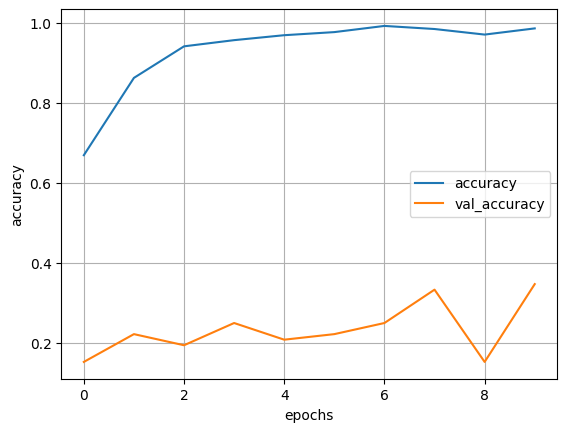

In [10]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_FineTune.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [11]:
testLoss_FineTune, testAccuracy_FineTune = model3_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 196ms/step - accuracy: 0.4103 - loss: 22.4666
Test-loss: 24.281446, Test-accuracy: 0.391667


In [12]:
testLoss_FineTune, testAccuracy_FineTune = model3_FT.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - accuracy: 0.4103 - loss: 22.4666
Test-loss: 24.281446, Test-accuracy: 0.391667


In [13]:

model3_FT.load_weights("bestFT.weights.h5")

In [14]:
y_proba = model3_FT.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 622ms/step
[0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 3 1 0 1 1
 0 0 0 0 3 1 0 0 1 1 1 1 3 0 3 0 1 1 1 0 0 0 1 0 0 0 3 0 0 0 0 3 1 0 1 1 3
 0 0 0 0 0 0 0 0 3 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 3 1 0 0 1 1
 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 3 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1
 3 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 3 0 0 0 0 0 0 1 0 1 0 1 0 0 1]


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[50,  0,  0,  0,  0],
       [18, 32,  0,  0,  0],
       [ 9, 41,  0,  0,  0],
       [38,  0,  0, 12,  0],
       [40,  0,  0,  0,  0]])

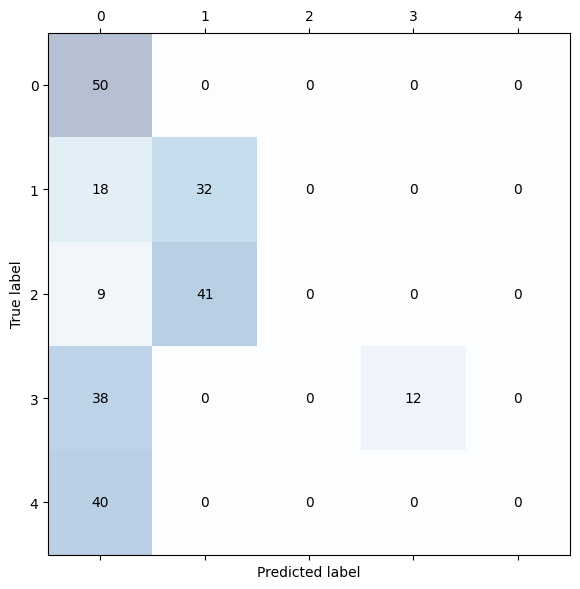

In [16]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.36686183532184413
Recall:  0.39166666666666666
F1-score:  0.2906722615613253






/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
model3_FT.save("//content/drive/MyDrive/DL PROJECT/Model3_FT.keras")